# Forest Fire Project - EDA and Visualization

In [93]:
# import and setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from IPython.display import HTML, display
display(HTML("""
<style>
.dataframe {
    font-family: 'Consolas'}

.dataframe th, .dataframe td {
    font-family: 'Consolas'}
</style>
"""))

## Analysis, Cleaning and Manipulating of Data

In [56]:
forest_data = pd.read_csv('G:/My Drive/Coding/Forest Fire Project/Forest_Fires_Dataset__1881-2025_.csv')
forest_data.head()

,Country,Year,Month,Region,Fires_Count,Burned_Area_Ha,Cause,Temperature_C,Humidity_Percent,Wind_Speed_kmh
0,Turkey,1881,August,Mugla,353,76920,Lightning,33,91,25
1,Turkey,1881,July,Antalya,154,64920,Lightning,38,34,39
2,Turkey,1881,June,Izmir,196,83204,Unknown,36,93,50
3,Spain,1881,July,Catalonia,63,84578,Lightning,42,64,16
4,Spain,1881,October,Andalusia,450,84754,Deforestation,17,55,8


In [57]:
forest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           4060 non-null   object
 1   Year              4060 non-null   int64 
 2   Month             4060 non-null   object
 3   Region            4060 non-null   object
 4   Fires_Count       4060 non-null   int64 
 5   Burned_Area_Ha    4060 non-null   int64 
 6   Cause             4060 non-null   object
 7   Temperature_C     4060 non-null   int64 
 8   Humidity_Percent  4060 non-null   int64 
 9   Wind_Speed_kmh    4060 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 317.3+ KB


In [58]:
forest_data.columns

Index(['Country', 'Year', 'Month', 'Region', 'Fires_Count', 'Burned_Area_Ha',
       'Cause', 'Temperature_C', 'Humidity_Percent', 'Wind_Speed_kmh'],
      dtype='object')

In [59]:
forest_data.describe()

,Year,Fires_Count,Burned_Area_Ha,Temperature_C,Humidity_Percent,Wind_Speed_kmh
count,4060.000000,4060.000000,4060.000000,4060.000000,4060.000000,4060.000000
mean,1953.000000,253.333990,50228.442857,32.036946,49.247783,35.777094
std,41.862055,143.526274,29510.610783,9.976450,26.088110,19.511724
min,1881.000000,5.000000,118.000000,15.000000,5.000000,2.000000
25%,1917.000000,131.000000,23842.250000,23.000000,27.000000,18.000000
50%,1953.000000,253.000000,50198.000000,32.000000,49.000000,36.000000
75%,1989.000000,377.250000,76566.750000,40.000000,72.000000,53.000000
max,2025.000000,499.000000,99987.000000,49.000000,94.000000,69.000000


In [60]:
causes = forest_data['Cause'].unique()
countries = forest_data['Country'].unique()
regions = forest_data['Region'].unique()

print(causes)
print(f'Number of causes: {len(causes)}')  
print('-' * 100)
print(countries)
print(f'Number of countries: {len(countries)}')
print('-' * 100)
print(regions)
print(f'Number of regions: {len(regions)}')

['Lightning' 'Unknown' 'Deforestation' 'Human' 'Climate Change']
Number of causes: 5
----------------------------------------------------------------------------------------------------
['Turkey' 'Spain' 'USA' 'Brazil' 'Greece' 'Australia' 'Portugal' 'Italy'
 'Russia' 'Canada' 'France' 'China' 'India']
Number of countries: 13
----------------------------------------------------------------------------------------------------
['Mugla' 'Antalya' 'Izmir' 'Catalonia' 'Andalusia' 'California' 'Texas'
 'Oregon' 'Amazonas' 'Mato Grosso' 'Athens' 'Crete' 'New South Wales'
 'Victoria' 'Lisbon' 'Porto' 'Sicily' 'Sardinia' 'Siberia' 'Far East'
 'British Columbia' 'Alberta' 'Corsica' 'Provence' 'Yunnan' 'Sichuan'
 'Madhya Pradesh' 'Assam']
Number of regions: 28


### Conclusions:

- No missing data -> perfect dataset to use as a playground
- ranges from 1881 until 2025 -> real data??
- includes burned areas, temeratures, humidity, wind speed and cause.
- temperature ranges from 15 up to 49 degrees (measured in °C)
- 5 different reasons, in 13 countires and 28 regions
- General Conclusion: Synthetic Data 

### 1st Problem: The Month Column

The column is formatted as a string -> doesn't work good for filters and visualization

Mission: Map the string-formatted months to numbers as 1 - 12

In [61]:
# creating a map for all the months
month_map = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December':12
}

# mapping the values and store them in a new column
forest_data['Month_Num'] = forest_data['Month'].map(month_map)

# deleting the Month column and replacing it with Month_Num
# storing the col in a variable first
month_num_col = forest_data['Month_Num']

# dropping both columns to insert Month_Num on the correct position
forest_data = forest_data.drop(['Month', 'Month_Num'], axis=1)

# inserting the Month_Num col in the right direction
forest_data.insert(2,'Month_Num', month_num_col)


# checking if it worked
print(forest_data.info())
forest_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4060 entries, 0 to 4059
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           4060 non-null   object
 1   Year              4060 non-null   int64 
 2   Month_Num         4060 non-null   int64 
 3   Region            4060 non-null   object
 4   Fires_Count       4060 non-null   int64 
 5   Burned_Area_Ha    4060 non-null   int64 
 6   Cause             4060 non-null   object
 7   Temperature_C     4060 non-null   int64 
 8   Humidity_Percent  4060 non-null   int64 
 9   Wind_Speed_kmh    4060 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 317.3+ KB
None


,Country,Year,Month_Num,Region,Fires_Count,Burned_Area_Ha,Cause,Temperature_C,Humidity_Percent,Wind_Speed_kmh
0,Turkey,1881,8,Mugla,353,76920,Lightning,33,91,25
1,Turkey,1881,7,Antalya,154,64920,Lightning,38,34,39
2,Turkey,1881,6,Izmir,196,83204,Unknown,36,93,50
3,Spain,1881,7,Catalonia,63,84578,Lightning,42,64,16
4,Spain,1881,10,Andalusia,450,84754,Deforestation,17,55,8


## Visualization and Answering Questions

In [62]:
# setup 
from plotting_utils import sns_plot_setup, px_plot_setup

# setting up a dictionary, to keep the same colors for each country
color_list = sns.husl_palette(n_colors=len(countries),
                               s=0.99,
                               l=0.6)

country_color_map = dict(zip(countries, color_list))


sns_plot_setup(palette='plasma')
px_plot_setup()

### Question 1: Which of the causes resulted in the most fires?

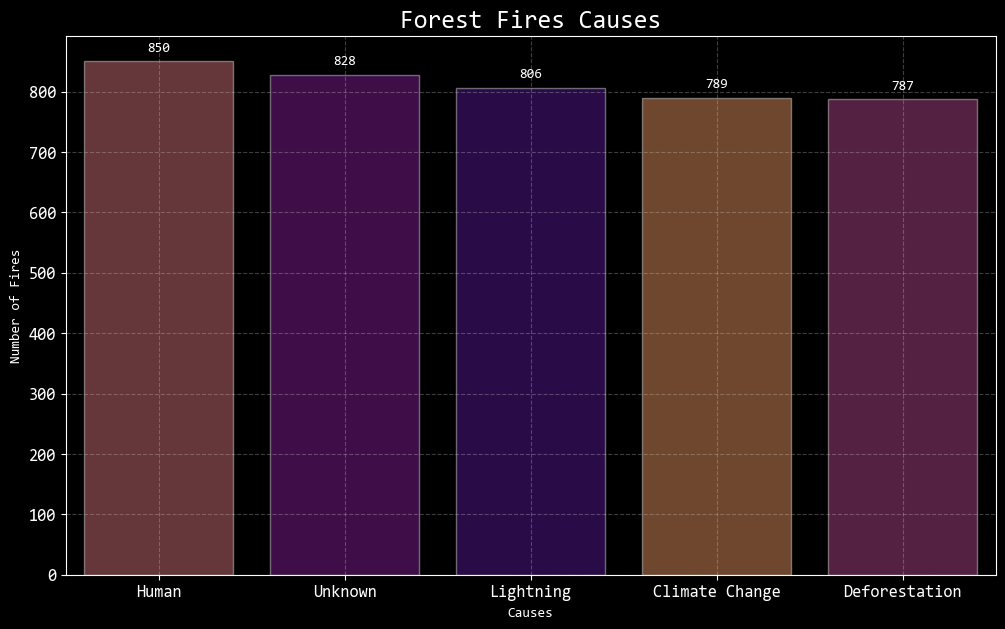

In [63]:
# creating a countplot to show the sum of causes
ax = sns.countplot(data=forest_data,
                   x='Cause', hue='Cause',
                   order=forest_data['Cause'].value_counts().index,
                   edgecolor='#cccccc', alpha=0.5, legend=False)

# changing the labels for the axes
ax.set_ylabel('Number of Fires', fontsize=10)
ax.set_xlabel('Causes', fontsize=10)

# labelling the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                color='white', fontsize=10)

# plotting
plt.title('Forest Fires Causes')
plt.grid(True)
plt.show()

#### Conclusion:

The most reasons for the fires where either Human or unknown reasons, the Natural desasters (Lighning strikes) are in the middle of the causes - approximately 20% of all fires.

If you think about the other reasons like climate change or Deforestation, both of them are also human-made reasons for Forest fires.

This leads to the conclusion that at least **3 of 4 fires** are caused by humans - if you let out the unknown reasons which could also be caused by humankind.

### Question 2: Which of the Countries had the most forest Fires? And which Country took the most damage?

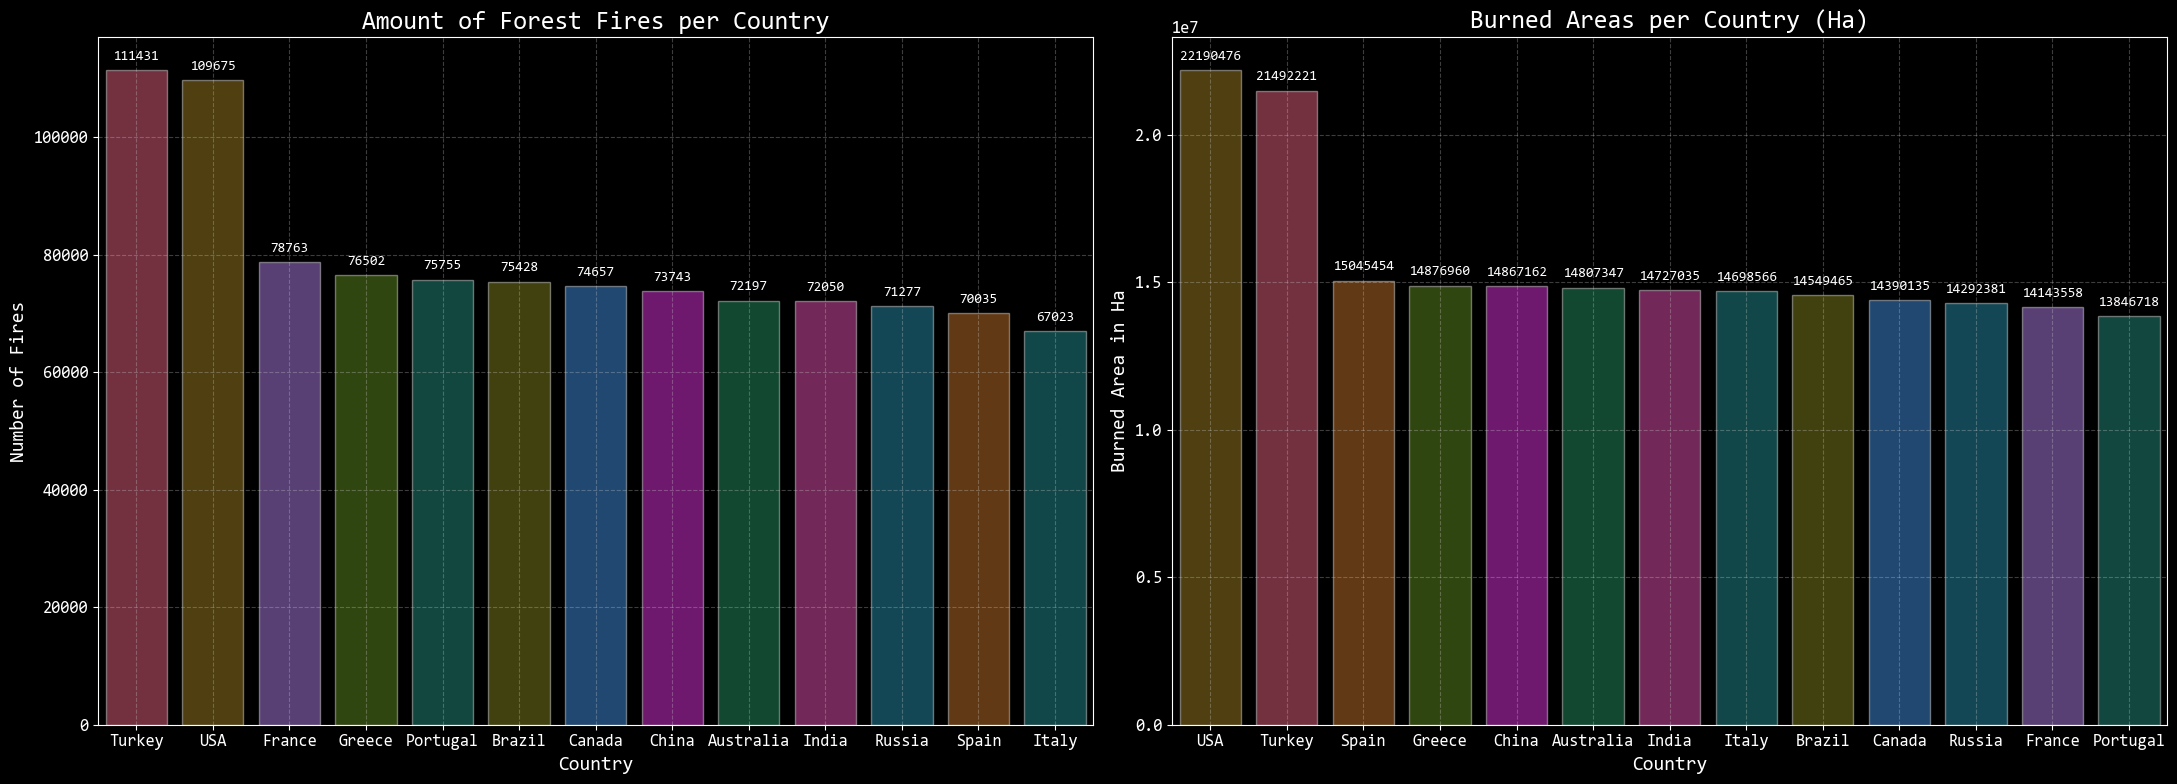

In [64]:
# Plots - Number of Forest Fires per Country and Burned Area per Country

# grouping the sum of forest fires and Burned Area for each country and storing it into a new DataFrame
fires_per_country =pd.DataFrame(forest_data.groupby('Country')['Fires_Count'].sum())
burned_area_per_country = pd.DataFrame(forest_data.groupby('Country')['Burned_Area_Ha'].sum())

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

# plotting the number of forest fires 
sns.barplot(data=fires_per_country,
                 x='Country', y='Fires_Count',hue='Country',
                 order=fires_per_country.sort_values(by='Fires_Count', ascending=False).index,
                 palette= country_color_map,
                 ax=ax1,
                 legend=False, edgecolor='#cccccc', alpha=0.5)

# labeling the bars for ax1
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                color='white', fontsize=10)

# labeling the first plot
ax1.set_title('Amount of Forest Fires per Country')
ax1.set_ylabel('Number of Fires')
ax1.set_xlabel('Country')
ax1.grid(True)

# plotting the burned area
sns.barplot(data=burned_area_per_country,
                 x='Country', y='Burned_Area_Ha',hue='Country',
                 order=burned_area_per_country.sort_values(by='Burned_Area_Ha', ascending=False).index,
                 palette= country_color_map,
                 ax=ax2,
                 legend=False, edgecolor='#cccccc', alpha=0.5)

# labeling the bars for ax2
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                color='white', fontsize=10)


# setting the labels
ax2.set_title('Burned Areas per Country (Ha)')
ax2.set_ylabel('Burned Area in Ha')
ax2.set_xlabel('Country')
ax2.grid(True)

# plotting
plt.tight_layout()
plt.show()

#### Conclusion:

It can clearly be seen with the naked eye that the USA and Turkey are the notorious top performers of Forest Fires in the past 140 years.

It is also visible that even though turkey has had slightly more fires than the USA, there was slightly more area burnt in the USA. This makes sense on one hand, because the total area of the USA and its forest is much bigger than the turkish land mass

This also leads to a new understanding of the charts because if one compares the area of Turkey and the USA it is even more shocking that almost the same area was burned in a way smaller country.

If you try to express this in numbers, the conclusion is even more mind-dazzling:

-> The burned area of the USA equals ca. 2.26% of the total landmass while the burnt area of Turkey covers almost one third of its landmass!

Another not less exciting aspect is that Spain and France switched their spots in the ranking. Spain had the second least amount of fires, while France was placed third in the first plot.                                   
Now the burned area shows that Spain is now placed on position 3 while France had the second least area burned since 1881.

This leads us to:

### Question 3: How much area was burned per country on average?

In [65]:
# creating an new DataFrame for BOTH, [Burned_Area_Ha] and [Fires_Count] and grouping it with the countries
country_summary = forest_data.groupby('Country')[['Fires_Count', 'Burned_Area_Ha']].sum()

# creating a new column to show the destruction per fire
country_summary['Area_per_Fire'] = country_summary['Burned_Area_Ha'] / country_summary['Fires_Count']

# sorting the DataFrame 
country_summary = country_summary.sort_values(by='Area_per_Fire', ascending=False)

country_summary

,Fires_Count,Burned_Area_Ha,Area_per_Fire
Country,,,
Italy,67023,14698566,219.306298
Spain,70035,15045454,214.827643
Australia,72197,14807347,205.096431
India,72050,14727035,204.400208
USA,109675,22190476,202.329391
China,73743,14867162,201.607773
Russia,71277,14292381,200.518835
Greece,76502,14876960,194.464981
Brazil,75428,14549465,192.892096


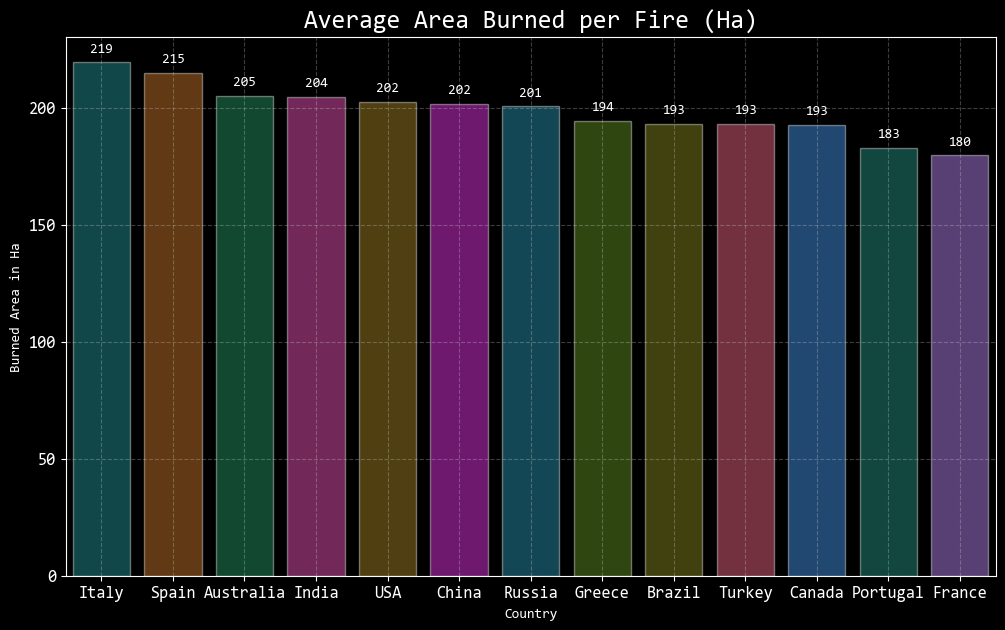

In [66]:
# Plot - Average Area burned per Fire

# plotting the results
ax = sns.barplot(data=country_summary,
                 x='Country', y='Area_per_Fire',hue='Country',
                 order=country_summary.sort_values(by='Area_per_Fire', ascending=False).index,
                 palette= country_color_map,
                 legend=False, edgecolor='#cccccc', alpha=0.5)

# setting the labels
ax.set_ylabel('Burned Area in Ha', fontsize=10)
ax.set_xlabel('Country', fontsize=10)

# labeling the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                color='white', fontsize=10)
    
# plotting
ax.set_title('Average Area Burned per Fire (Ha)')
plt.grid(True)
plt.show()

#### Conclusions:

With this new Plot it becomes clear that the huge burned area of Turkey and the USA is mostly caused by the huge amount of forest fires.

As already seen in Question 2, Spain for example, has a low amount of fires but a much higher amount of burned area - now you can see the "few" fires in spain did severe damage and burned approximately 215 ha on average.

In France on the other hand there were many fires, that did not cause so much damage, so the burned area is very low.

But the most confusing or unexpected aspect is that Italy has the highest burned area per fire - this explains the climb-up in between the last spot in the amount of Firest Fires up to place #8 in the burned area. 

### Question 4: When did the Fires happen? Which years had the most Fires? Which Months had the most Fires? 

#### 4.1 Seasonality Analysis

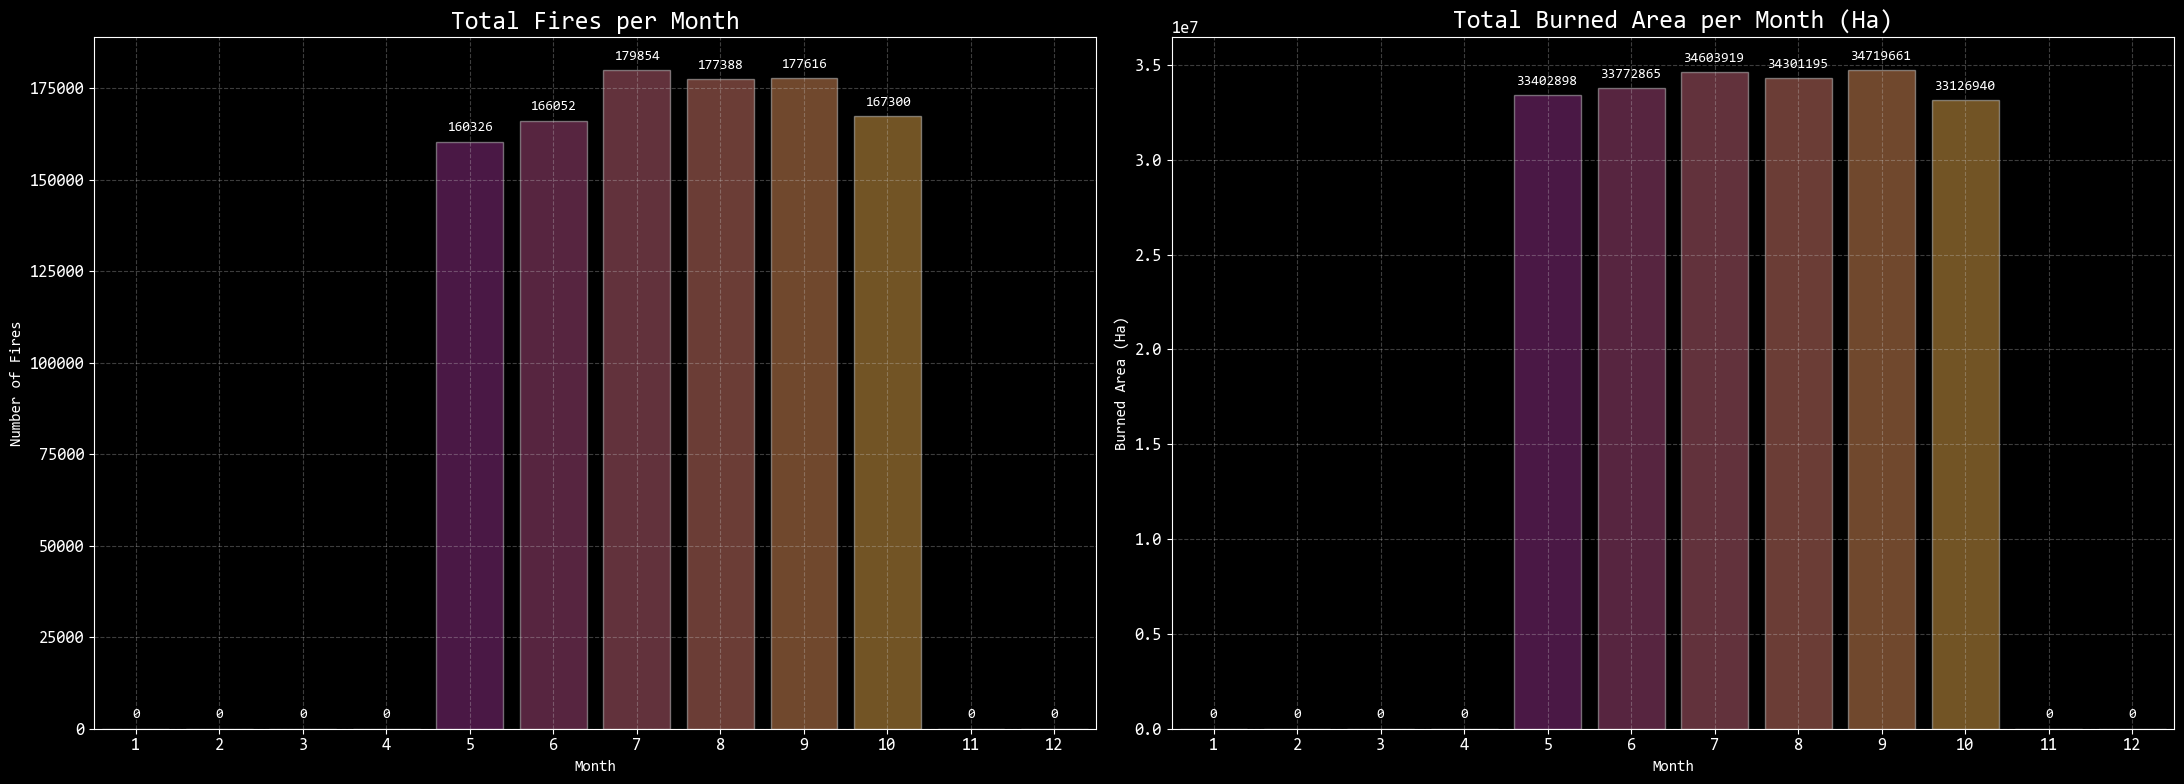

In [67]:
# Plots - Fires per Month and burned Area per Month

# creating a new DataFrame to group the month by Amount of Fires and Burned Area
month_summary = forest_data.groupby('Month_Num')[['Fires_Count', 'Burned_Area_Ha']].sum()

#changing the index, so all 12 months are displayed
all_months_index = pd.Index(range(1,13), name='Month_Num')
month_summary_complete = month_summary.reindex(all_months_index).fillna(0)

# creating the subplots canvas
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22,8))

# plotting the fires per Month
sns.barplot(
    data=month_summary_complete,
    x=month_summary_complete.index,
    y='Fires_Count',
    hue='Month_Num',
    ax = ax1,
    palette='plasma',
    legend=False,
    edgecolor='#cccccc',
    alpha=0.5,
    )
ax1.set_title('Total Fires per Month')
ax1.set_ylabel('Number of Fires', fontsize=11)
ax1.set_xlabel('Month', fontsize=11)
ax1.grid(True)
# labeling the axes for ax1.patches
for p in ax1.patches:
    ax1.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                color='white', fontsize=10)
    
# plotting the burned area per month
sns.barplot(
    data=month_summary_complete,
    x=month_summary_complete.index,
    y='Burned_Area_Ha',
    hue='Month_Num',
    ax = ax2,
    palette='plasma',
    legend=False,
    edgecolor='#cccccc',
    alpha=0.5,
    )
ax2.set_title('Total Burned Area per Month (Ha)')
ax2.set_ylabel('Burned Area (Ha)', fontsize=11)
ax2.set_xlabel('Month', fontsize=11)
ax2.grid(True)

# labeling the axes for ax1.patches
for p in ax2.patches:
    ax2.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                color='white', fontsize=10)

# displaying the plot
plt.tight_layout()
plt.show()

##### Conclusion:

The data shows a clear "fire season" concentraded in the summer months of the Northerm Hemisphere (May-Oct). This is a fascinating bias in the dataset,   
especially since some of the major southern hemisphere countires like Australia and Brazil are also represented in the dataset - the real world "fire seasons" would differ from this dataset.

It can be assumed that (only considered to the countries above the equator) this makes sense because the "warmer" month have higher temperature and less humidity.  
Due to missing data this cannot be compared in this dataset and can be seen as an assumption.

It can be recognized that the peak months are July to September which in both figures have the highest amount of fires and burned area

A surprising and exciting fact can be seen on the May bar: There are the least burns in May but the burned area steps up very high, compared to the October bar

#### 4.2 Yearly Trends

In [68]:
# Plots - Number of Fires and Burned Area per Year

# creating a new DataFrame to group [Burned_Area_Ha] and [Fires_Count] with Year
year_summary = forest_data.groupby('Year')[['Fires_Count', 'Burned_Area_Ha']].sum().reset_index()



px.line(data_frame=year_summary, x='Year', y='Fires_Count', title='Total Forest Fires per Year (1881-2025)',labels={'Fires_Count': 'Number of Fires'}, )



##### Conclusion:

The plot is highly volatile and there is no real pattern recognizable. This can look surprising because in thought of the climate change there should be a slight change upwards - this again proves the synthetical data.

There are some peaks between 1910 and 1920 and in the 1970's   
It seems also surprising that there are no high peaks during the world wars which would make sense - it indicates once again the hypothesis of synthetical data.

The highest peak can be seen in 2013 and the lowest in 1919. This could be a part of further investigation.

### Question 5: How does the climate differ for each country?

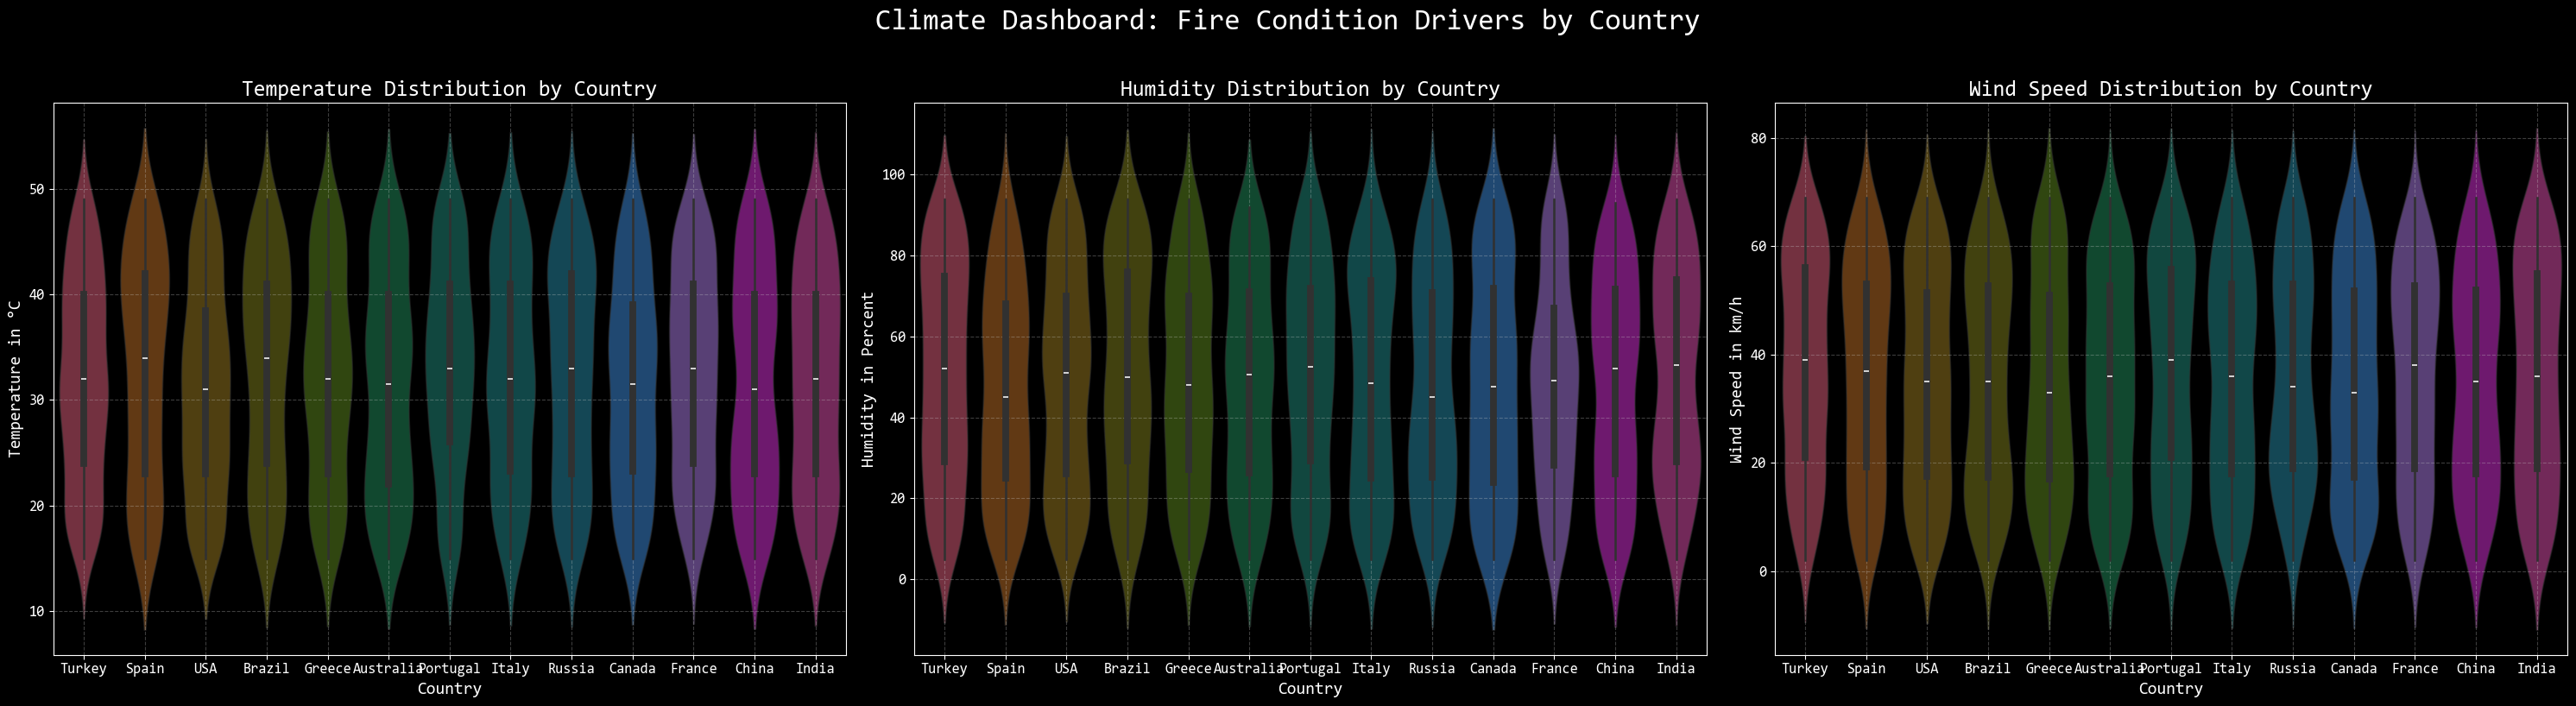

In [92]:
# Plots -  CLimate Dashboard

# setting up the subplpots
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30,8))

fig.suptitle('Climate Dashboard: Fire Condition Drivers by Country', fontsize=24, y=1.02)
# creating the Temperature Distribution Plot
sns.violinplot(data=forest_data,
                 x='Country',
                 y='Temperature_C',
                 hue="Country",
                 palette=country_color_map,
                 ax=ax1,
                 legend=False, alpha=0.5)

# setting the labels for plot 1
ax1.set_title('Temperature Distribution by Country')
ax1.set_ylabel('Temperature in °C')
ax1.set_xlabel('Country')
ax1.grid(True)

# creating the Humidity Distribution Plot
sns.violinplot(data=forest_data,
                 x='Country',
                 y='Humidity_Percent',
                 hue='Country',
                 palette=country_color_map,
                 ax=ax2,
                 legend=False, alpha=0.5)

# setting the labels for plot 2
ax2.set_title('Humidity Distribution by Country')
ax2.set_ylabel('Humidity in Percent')
ax2.set_xlabel('Country')
ax2.grid(True)

# creating the Wind Speed Distribution
sns.violinplot(data=forest_data,
                 x='Country',
                 y='Wind_Speed_kmh',
                 hue='Country',
                 palette=country_color_map,
                 ax=ax3,
                 legend=False, alpha=0.5)

ax3.set_title('Wind Speed Distribution by Country')
ax3.set_ylabel('Wind Speed in km/h')
ax3.set_xlabel('Country')
ax3.grid(True)


plt.tight_layout()
plt.show()

#### Conclusion:

**Temperature**  

In Spain, Russia and Australia there are very high differences within the temperature ranges when fires happened.  
While in USA and Canada the temperaturoscillations are very low.

The average temperature in Spain is the highest and the mean temperature for the USa is the lowest.  
Our other top tiers in case of the most burned area (Australia and Italy) are in the midfield range.  
=> This implicates that the Temperature alone can have impact on the fires but is not the onely trigger!

**Humidity**  

Here it is also visible that the Humidity in Spain has the lowest value and is mostly in the lower areas, USA and Turkey on the other hand have quite higher humidity which could explain, why the areas per fire weren't so high  
Again both Italy and Australia are in the mid area of which means the humidity is also just part of an inidicator for the burned area.

**Wind Speed**

In this plot you can see that Spain and Turkey both have high median wind speed while USA, Australia and Italy are again in midfield area.  
The highest values seem like to be in France but France is only in Place 3 in the Number of Fires, so the Wind Speed is also not a total indicator related to the fire reasons and burned areas.

# Forest Fire Project - Machine Learning Model

The plan is to estimate the extent of Damage. This means the target variable is the Burned Area - this needs to be predicted by the machine Learning Model

In [ ]:
# setup code


### Correlation Matrix

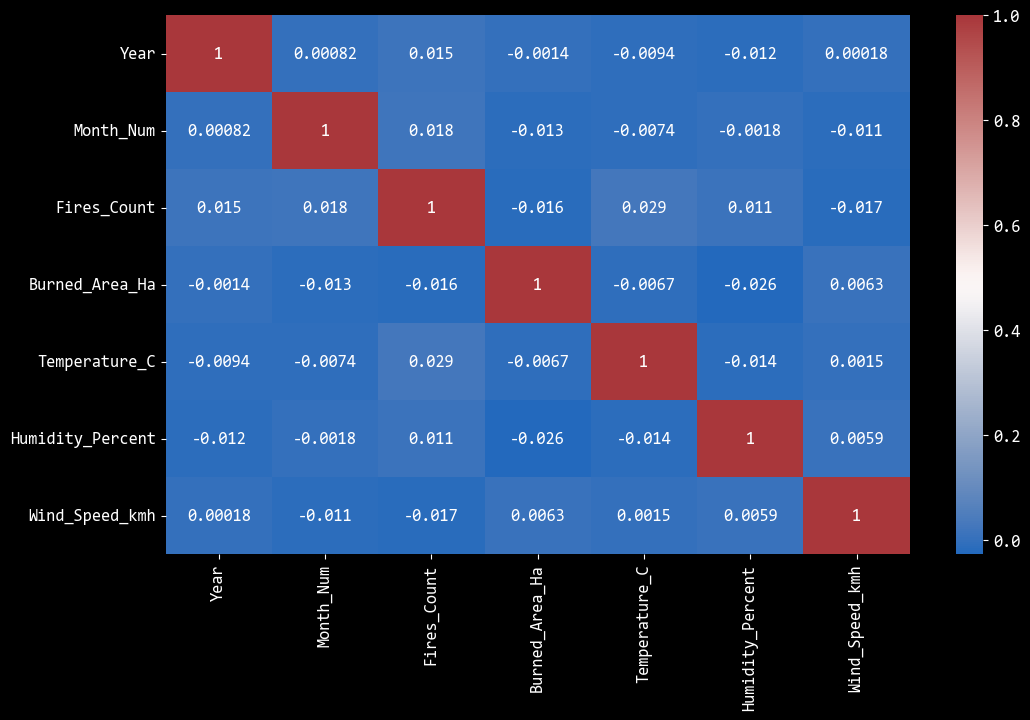

In [99]:
# setting up a heatmap to visualize the correlation between the variables
# removing the object dtypes first to remove errors
forest_data_nums = forest_data.copy().drop(columns=['Country', 'Region', 'Cause'])

corr_matrix = forest_data_nums.corr()

sns.heatmap(data=corr_matrix, annot=True, cmap='vlag')

plt.show()